## 7.1

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


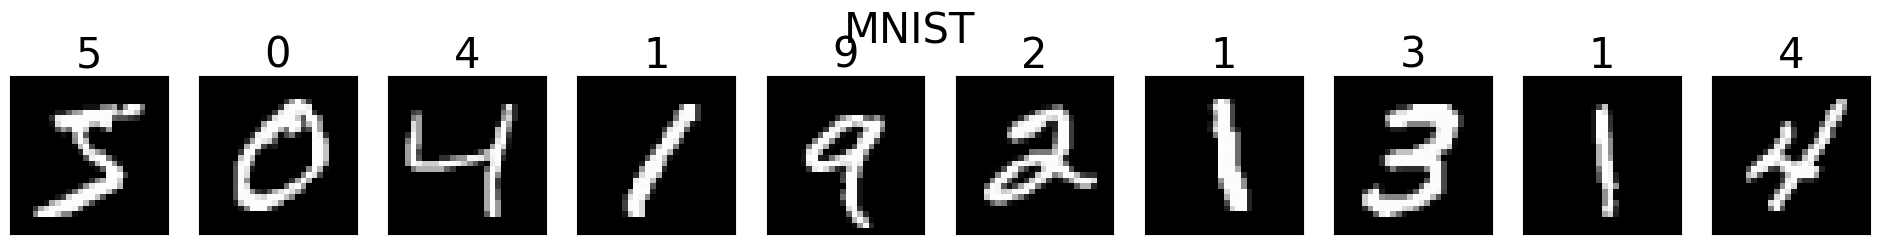

In [5]:
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize = 30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]), fontsize = 30)

In [6]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_names = ['airplane', 'car', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


TypeError: Invalid shape (784,) for image data

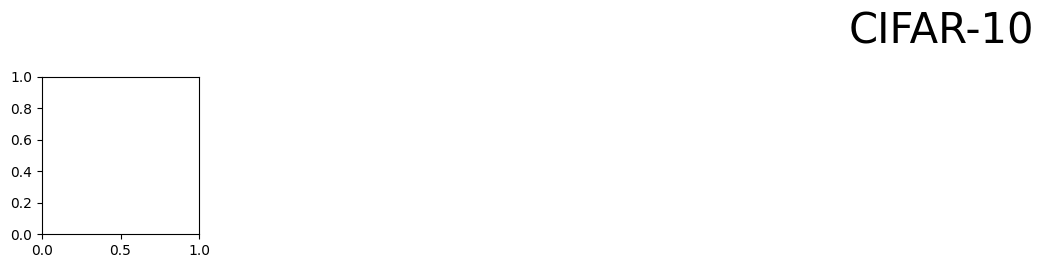

In [14]:
plt.figure(figsize = (24,3))
plt.suptitle('CIFAR-10', fontsize = 30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]], fontsize = 30)

## 7.2

In [9]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [10]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
mlp = Sequential()
mlp.add(Dense(units = 512, activation = 'tanh', input_shape = (784,)))
mlp.add(Dense(units = 10, activation = 'softmax'))

In [13]:
mlp.compile(loss = 'MSE', optimizer = SGD(learning_rate = 0.01), metrics = ['accuracy'])
mlp.fit(x_train, y_train, batch_size = 128, epochs=50, validation_data=(x_test, y_test), verbose = 2)

res = mlp.evaluate(x_test, y_test, verbose = 0)
print('정확률=', res[1]*100)

Epoch 1/50


469/469 - 3s - loss: 0.0912 - accuracy: 0.1374 - val_loss: 0.0887 - val_accuracy: 0.2049 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0854 - accuracy: 0.2831 - val_loss: 0.0824 - val_accuracy: 0.3520 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0787 - accuracy: 0.4136 - val_loss: 0.0754 - val_accuracy: 0.4645 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0717 - accuracy: 0.5067 - val_loss: 0.0682 - val_accuracy: 0.5478 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0650 - accuracy: 0.5788 - val_loss: 0.0617 - val_accuracy: 0.6129 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0590 - accuracy: 0.6427 - val_loss: 0.0559 - val_accuracy: 0.6761 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0537 - accuracy: 0.6942 - val_loss: 0.0509 - val_accuracy: 0.7195 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0492 - accuracy: 0.7268 - val_loss: 0.0467 - val_accuracy: 0.7440 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2

## 7.3

In [15]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [16]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [17]:
mlp = Sequential()
mlp.add(Dense(units = 512, activation = 'tanh', input_shape =(784,)))
mlp.add(Dense(units = 10, activation = 'softmax'))

In [18]:
mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0150 - accuracy: 0.8999 - val_loss: 0.0107 - val_accuracy: 0.9304 - 3s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0089 - accuracy: 0.9425 - val_loss: 0.0076 - val_accuracy: 0.9510 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9590 - val_loss: 0.0062 - val_accuracy: 0.9595 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0050 - accuracy: 0.9686 - val_loss: 0.0053 - val_accuracy: 0.9653 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0041 - accuracy: 0.9750 - val_loss: 0.0049 - val_accuracy: 0.9676 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9795 - val_loss: 0.0043 - val_accuracy: 0.9724 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0028 - accuracy: 0.9835 - val_loss: 0.0039 - val_accuracy: 0.9756 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0024 - accuracy: 0.9866 - val_loss: 0.0039 - val_accuracy: 0.9742 - 3s/epoch - 7ms/step
Epoch 9/50
469/469 - 3s 

## 7.4

In [19]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [20]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [21]:
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 2s - loss: 0.0892 - accuracy: 0.1662 - val_loss: 0.0860 - val_accuracy: 0.2741 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0829 - accuracy: 0.3549 - val_loss: 0.0793 - val_accuracy: 0.4412 - 2s/epoch - 5ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0760 - accuracy: 0.4933 - val_loss: 0.0720 - val_accuracy: 0.5517 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0688 - accuracy: 0.5692 - val_loss: 0.0648 - val_accuracy: 0.6052 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0622 - accuracy: 0.6241 - val_loss: 0.0584 - val_accuracy: 0.6626 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0564 - accuracy: 0.6819 - val_loss: 0.0528 - val_accuracy: 0.7222 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0512 - accuracy: 0.7325 - val_loss: 0.0479 - val_accuracy: 0.7627 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0468 - accuracy: 0.7629 - val_loss: 0.0438 - val_accuracy: 0.7866 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

In [22]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0146 - accuracy: 0.9025 - val_loss: 0.0099 - val_accuracy: 0.9359 - 3s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0088 - accuracy: 0.9431 - val_loss: 0.0074 - val_accuracy: 0.9514 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9592 - val_loss: 0.0063 - val_accuracy: 0.9586 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0050 - accuracy: 0.9688 - val_loss: 0.0052 - val_accuracy: 0.9652 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0041 - accuracy: 0.9754 - val_loss: 0.0046 - val_accuracy: 0.9705 - 3s/epoch - 5ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9796 - val_loss: 0.0044 - val_accuracy: 0.9721 - 3s/epoch - 5ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0029 - accuracy: 0.9828 - val_loss: 0.0042 - val_accuracy: 0.9731 - 3s/epoch - 5ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0023 - accuracy: 0.9867 - val_loss: 0.0037 - val_accuracy: 0.9758 - 3s/epoch - 5ms/step
Epoch 9/50
469/469 - 3s 

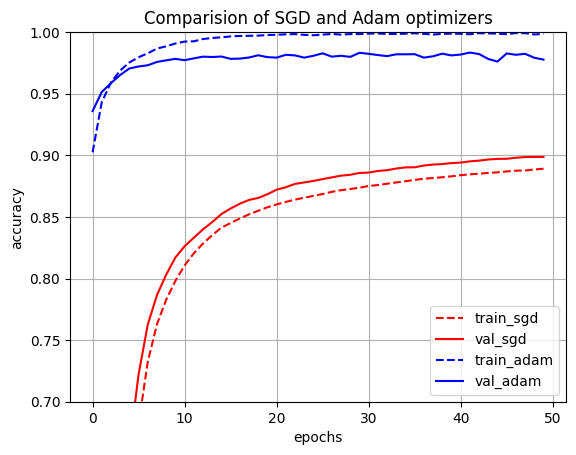

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparision of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

## 7.5

In [24]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [25]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [26]:
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation = 'relu', input_shape = (784,)))
dmlp.add(Dense(units=512, activation = 'relu'))
dmlp.add(Dense(units=512, activation = 'relu'))
dmlp.add(Dense(units=10, activation = 'softmax'))

In [27]:
dmlp.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate =0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_data = (x_test, y_test), verbose = 2)
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose = 0)[1]*100)

dmlp.save('dmlp_trained.h5')

Epoch 1/50
469/469 - 9s - loss: 0.4022 - accuracy: 0.8963 - val_loss: 0.1782 - val_accuracy: 0.9476 - 9s/epoch - 19ms/step
Epoch 2/50
469/469 - 8s - loss: 0.1427 - accuracy: 0.9587 - val_loss: 0.1337 - val_accuracy: 0.9594 - 8s/epoch - 17ms/step
Epoch 3/50
469/469 - 8s - loss: 0.0963 - accuracy: 0.9721 - val_loss: 0.0974 - val_accuracy: 0.9709 - 8s/epoch - 17ms/step
Epoch 4/50
469/469 - 8s - loss: 0.0700 - accuracy: 0.9795 - val_loss: 0.0807 - val_accuracy: 0.9747 - 8s/epoch - 17ms/step
Epoch 5/50
469/469 - 8s - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0745 - val_accuracy: 0.9768 - 8s/epoch - 17ms/step
Epoch 6/50
469/469 - 8s - loss: 0.0403 - accuracy: 0.9883 - val_loss: 0.0687 - val_accuracy: 0.9785 - 8s/epoch - 17ms/step
Epoch 7/50
469/469 - 8s - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.0628 - val_accuracy: 0.9793 - 8s/epoch - 17ms/step
Epoch 8/50
469/469 - 8s - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.0633 - val_accuracy: 0.9804 - 8s/epoch - 17ms/step
Epoch 9/50
469/4

C:\Users\tnv59\AppData\Local\anaconda3\envs\open_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 7.6

Epoch 1/50
391/391 - 17s - loss: 1.8322 - accuracy: 0.3404 - val_loss: 1.6753 - val_accuracy: 0.4040 - 17s/epoch - 44ms/step
Epoch 2/50
391/391 - 17s - loss: 1.6255 - accuracy: 0.4233 - val_loss: 1.5568 - val_accuracy: 0.4528 - 17s/epoch - 43ms/step
Epoch 3/50
391/391 - 16s - loss: 1.5380 - accuracy: 0.4543 - val_loss: 1.5151 - val_accuracy: 0.4641 - 16s/epoch - 41ms/step
Epoch 4/50
391/391 - 17s - loss: 1.4797 - accuracy: 0.4763 - val_loss: 1.4890 - val_accuracy: 0.4696 - 17s/epoch - 42ms/step
Epoch 5/50
391/391 - 16s - loss: 1.4257 - accuracy: 0.4955 - val_loss: 1.4347 - val_accuracy: 0.4902 - 16s/epoch - 41ms/step
Epoch 6/50
391/391 - 17s - loss: 1.3869 - accuracy: 0.5067 - val_loss: 1.4245 - val_accuracy: 0.4866 - 17s/epoch - 43ms/step
Epoch 7/50
391/391 - 16s - loss: 1.3419 - accuracy: 0.5235 - val_loss: 1.3922 - val_accuracy: 0.5045 - 16s/epoch - 42ms/step
Epoch 8/50
391/391 - 16s - loss: 1.3055 - accuracy: 0.5386 - val_loss: 1.3701 - val_accuracy: 0.5149 - 16s/epoch - 42ms/step


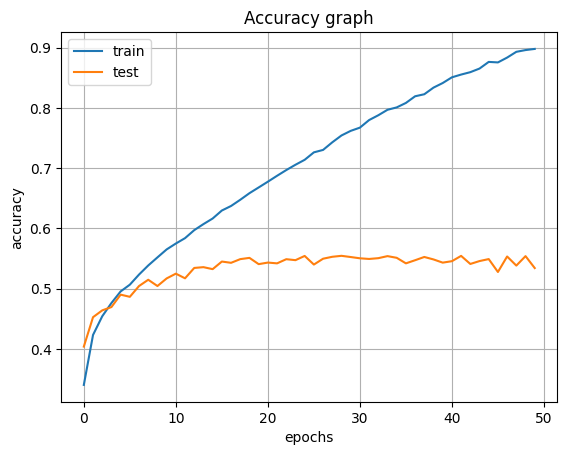

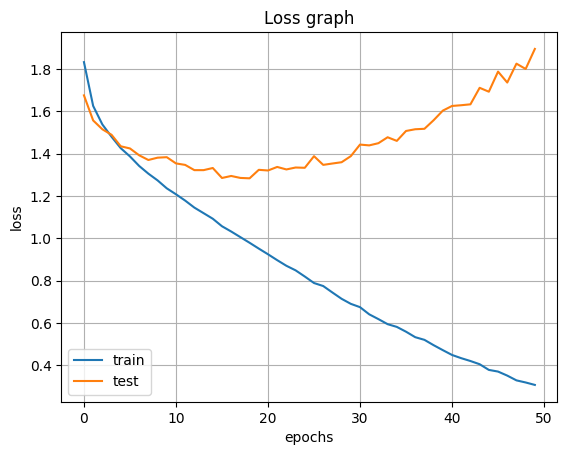

In [28]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

## 7.7

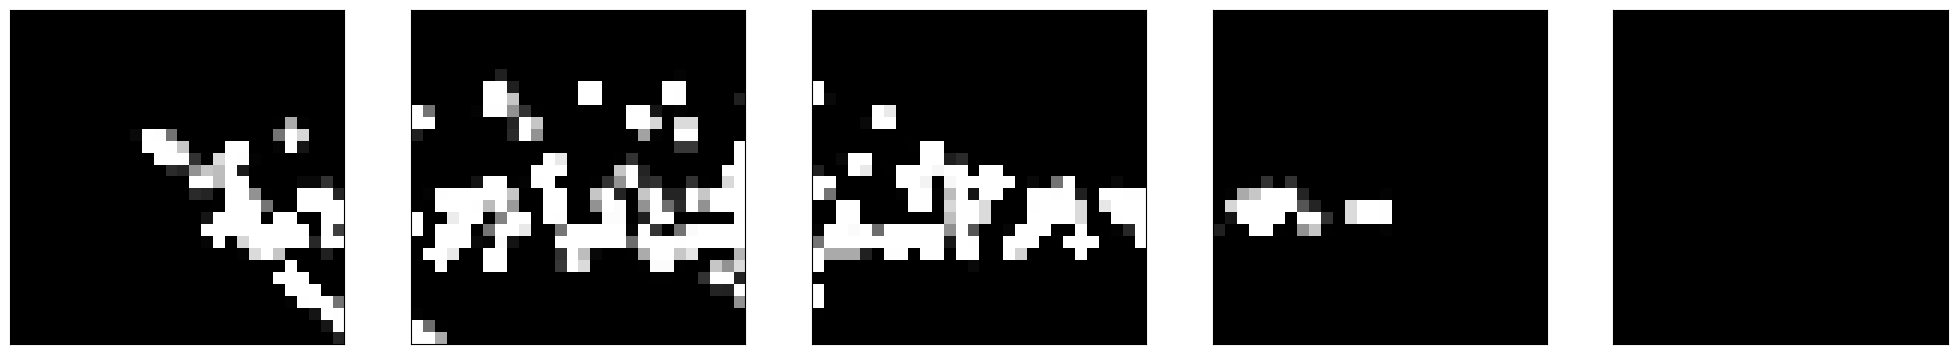

1/1 [==============================] - 0s 28ms/step


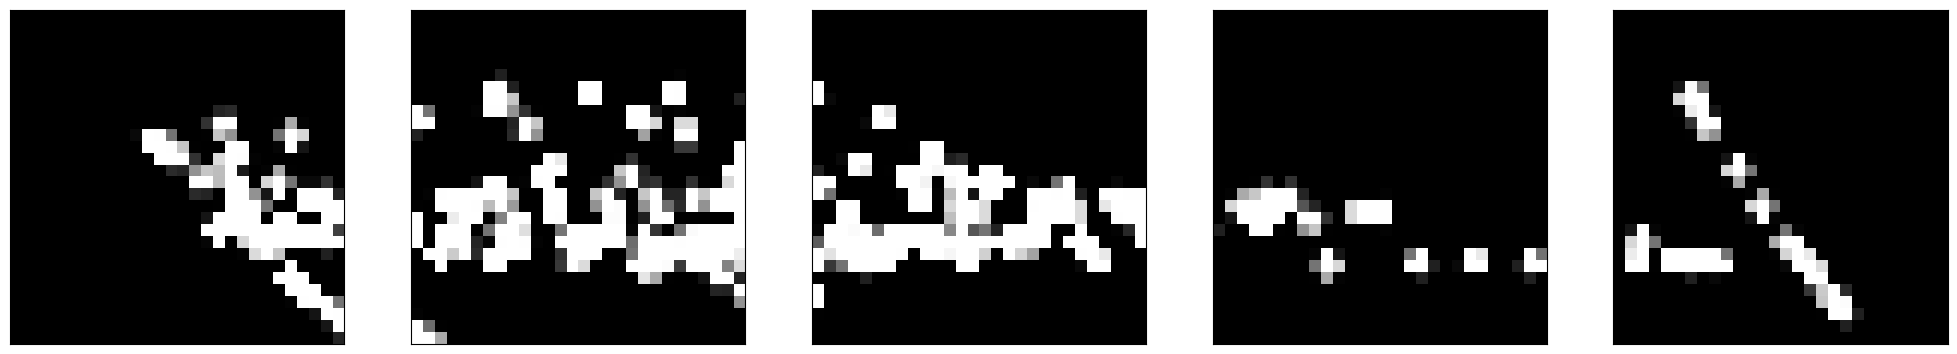

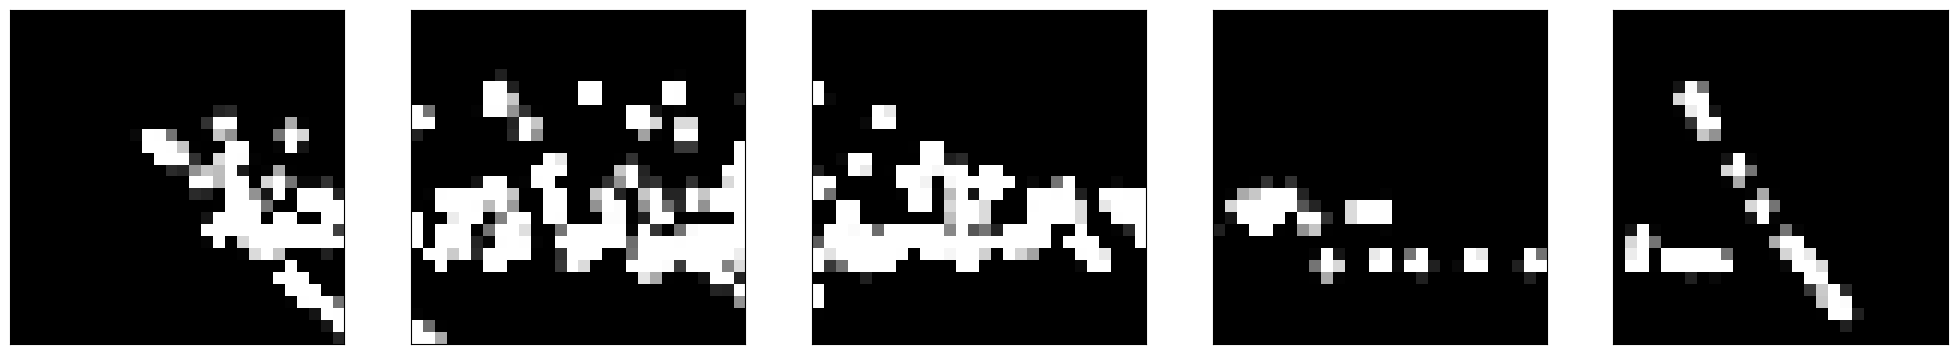

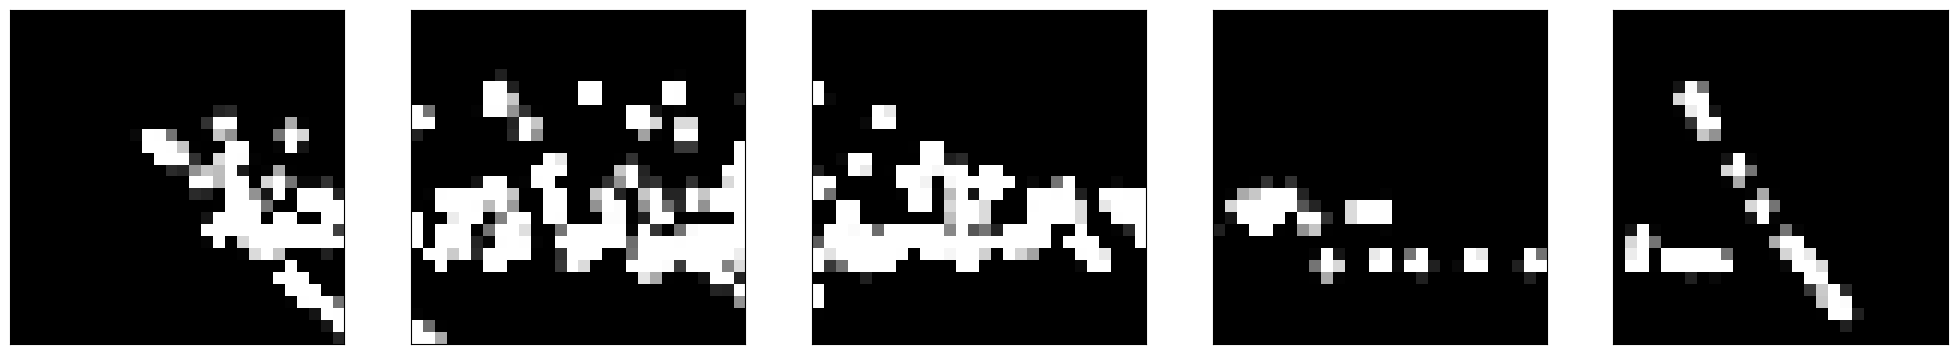

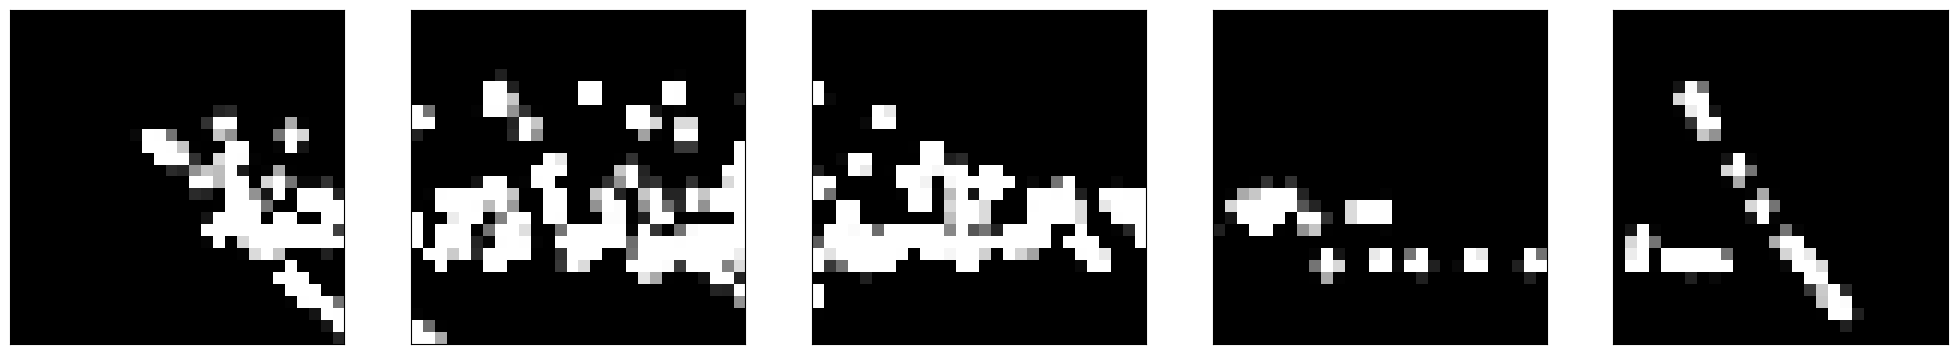

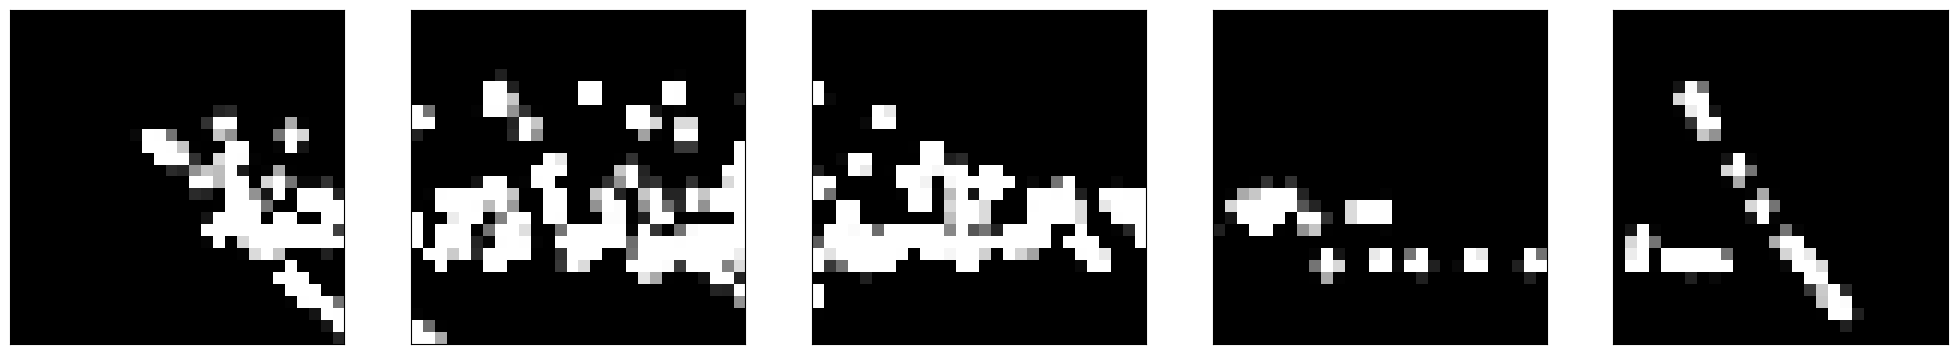

In [29]:
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()